In [25]:
%load_ext google.cloud.bigquery


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#create a new instance of the bigquery client
from google.cloud import bigquery

client = bigquery.Client()

#assign a variable to the query called query

query = """
SELECT
  timestamp
  
FROM
    `bigquery-public-data.crypto_bitcoin.blocks` blocks
Group by timestamp 
LIMIT
  10
"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
transaction = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
transaction.head(10)

,timestamp
0,2009-10-15 07:38:35+00:00
1,2009-10-26 00:54:42+00:00
2,2009-10-28 19:18:23+00:00
3,2009-10-20 16:14:28+00:00
4,2009-10-30 21:54:30+00:00
5,2009-10-24 16:15:07+00:00
6,2009-10-19 09:31:36+00:00
7,2009-10-24 13:29:14+00:00
8,2009-10-24 21:08:23+00:00
9,2009-10-19 10:16:42+00:00


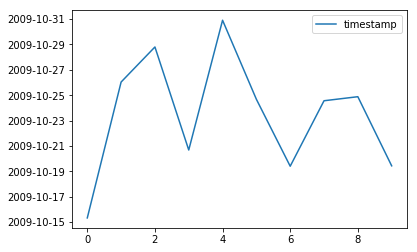

In [50]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

transaction.plot()